In [1]:
import random
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def create_gene(gene_length):
    return [random.randint(0, 1) for _ in range(gene_length)]

In [3]:
def create_population(population_size, gene_length):
    return [create_gene(gene_length) for _ in range(population_size)]

In [4]:
def fitness(gene):
    return sum(gene)

In [5]:
def selection_new(population, n):
    strongest = []
    for num in range(0, n):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.sample(range(0, len(population)), 3)
        strongest.append(max([population[i1], population[i2], population[i3]], key=fitness))
 
    return strongest

In [6]:
def selection(population, n):
    tmp = copy.deepcopy(population)
    parents = []
    for _ in range(n):
        if len(tmp) < n:
            break
        selected = random.sample(tmp, n)
        winner = max(selected, key=fitness)
        parents.append(winner)
        tmp.remove(winner)
    return parents

In [7]:
def crossingover(parent1, parent2):
    part1 = random.randint(1, len(parent1) - 1)
    child1 = parent1[:part1] + parent2[part1:]
    child2 = parent2[:part1] + parent1[part1:]
    return child1, child2

In [8]:
def mutate(gene, mutation_rate):
    for i in range(len(gene)):
        if random.random() < mutation_rate:
            gene[i] = 1 - gene[i]

In [9]:
def population_sum(population):
    summ = 0
    for gene in population:
        summ += sum(gene)
    return summ

In [12]:
def genetic_algorithm(population_size, gene_length, num_epoch, mutation_rate, tournament_size):
    if tournament_size > population_size:
        raise "Кол-во отборанных не может больше размера популяции"
    population = create_population(population_size, gene_length)
    best_genes = []
    avg_genes = []
    for epoch in range(num_epoch):
        new_population = []
        if tournament_size % 2 == 1:
            raise "Может быть только четное кол-во родителей"
        parents = selection_new(population, tournament_size)
        parents = [a.copy() for a in parents]
        #random.shuffle(parents)
        for i in range(0, len(parents) - 1, 2):
            child1, child2 = crossingover(parents[i], parents[i+1])
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)

        for gene in population:
            if gene in parents:
                population.remove(gene)
        population.extend(new_population)

        best_gene = max(population, key=fitness)
        
        best_genes.append(sum(best_gene))
        
        pop_summ = population_sum(population)
        avg_genes.append(pop_summ/len(population))

        
        if fitness(best_gene) == gene_length:
            break
    return best_gene, best_genes#, avg_genes

In [15]:
best_gene_br, sum_of_best_br = genetic_algorithm(200, 100, 1000, 0.001, 200)

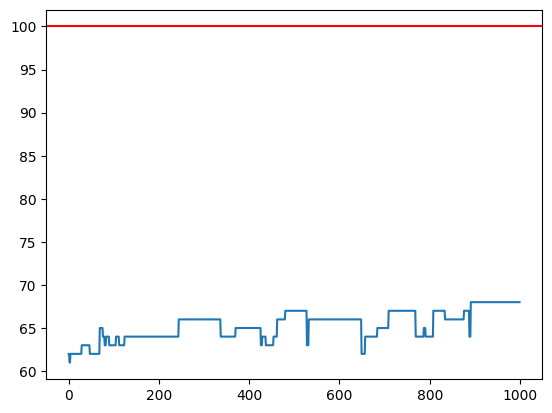

In [16]:
plt.plot(np.arange(len(sum_of_best_br)), sum_of_best_br)
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

In [17]:
best_gene, sum_of_best = genetic_algorithm(200, 100, 200, 0.001, 200)

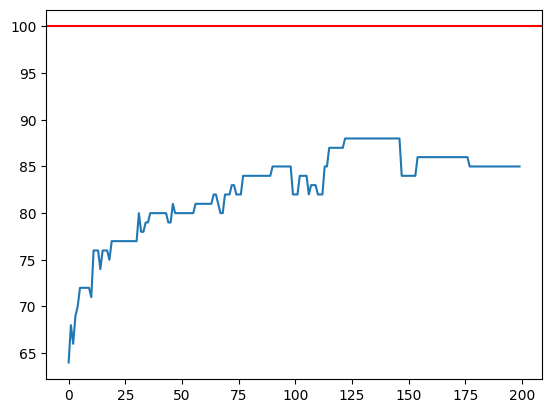

In [39]:
plt.plot(np.arange(len(sum_of_best)), sum_of_best)
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

In [26]:
best_gene1, sum_of_best1 = genetic_algorithm(200, 100, 200, 0.1, 200)

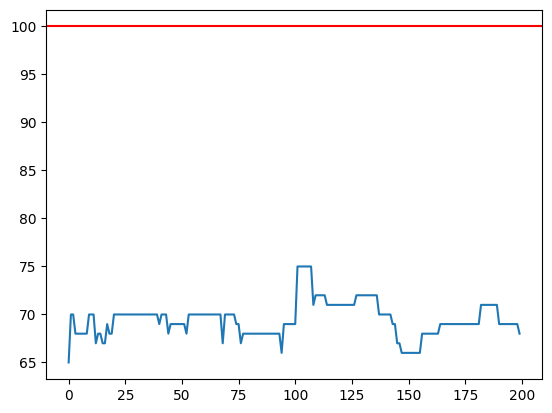

In [38]:
plt.plot(np.arange(len(sum_of_best1)), sum_of_best1)
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

In [34]:
best_gene2, sum_of_best2 = genetic_algorithm(200, 100, 300, 0.001, 50)

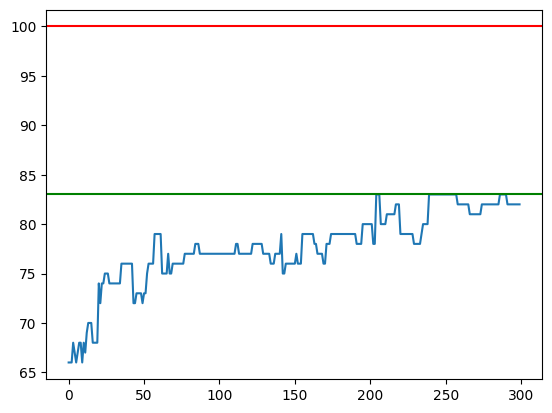

In [37]:
plt.plot(np.arange(len(sum_of_best2)), sum_of_best2)
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=max(sum_of_best2), color='g', linestyle='-')
plt.show()